# Linear Regression:

## Linear Regression Practical implementaion on Algerian Forest Fires Dataset

## Life cycle of Machine learning Project

In [ ]:
1.Understanding the Problem Statement 
2.Data Collection
3.Exploratory data analysis 
4.Data Cleaning 
5.Data Pre-Processing 
6.Model Training 
7.Choose best model

## 1.Problem Statement  

by using linear regression we have to predict the temperature

## 2.Data Collection

The Dataset is collected from UIC machine learning repository Dataset link : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

Attribute Information:

1.Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2.Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3.RH : Relative Humidity in %: 21 to 90
4.Ws :Wind speed in km/h: 6 to 29
5.Rain: total day in mm: 0 to 16.8 FWI Components
6.Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8.Drought Code (DC) index from the FWI system: 7 to 220.4
9.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10.Buildup Index (BUI) index from the FWI system: 1.1 to 68
11.Fire Weather Index (FWI) Index: 0 to 31.1
12.Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

## 2.1 importing data and required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## 2.2 import the dataset

Since data is in form of an csv file we have to use “pandas.read_csv” to load the data and store it in data frame as df.we are setting header = 1 means row 1 ,row 0 it will ignore

In [2]:
df=pd.read_csv(r"C:\Users\DHARAVATH RAMDAS\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## 2.3 first 5 rows

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## 2.4 last 5 rows

In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


# 2.5 shape of the data

In [6]:
df.shape

(246, 14)

observation :
    246 rows and 14 columns

## 3.Data Cleaning

In [7]:
### we have to remove the unnecessary rows from dataset after observation

In [8]:
df[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


observation:
    see the 122 row it contains the nan values see the 123 row it contains the categorical values we have to remove the 122 and 123 rows because it is different from the your data

### remove unnecessary rows from dataset

In [9]:
df.drop(index=[122,123],inplace=True)
#it will give index gap so we reset index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [10]:
# check rows

df.loc[122:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


Observation:
    we succesfully removed the nan values

### adding new feature named Region in a dataset

In [11]:
# we add region new column in dataset
# 1.method
df['Region'] = 0
for i in range(len(df)):
    if i >= 122:
        df['Region'][i] = 1

In [12]:
# 2.method
# df.loc[:122,"region"] = 'bejaia'
# df.loc[122:, 'region'] = 'sidi-bel abbes'

In [13]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


observation:
    we added new column sucessflly

In [14]:
### check the balanced data or not
df['Region'].value_counts()

0    122
1    122
Name: Region, dtype: int64

observation :- see the above bejaia is 122 and sidi-bel abbes is 122 times both are same equal

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

observation: see the columns some have the extra spaces so we have to remove it

### stripping the names of the columns

In [16]:
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

observation:- see the classes it contains some extra spaces so we have to remove it

### stripping the classes features column

In [18]:
df['Classes'] = df.Classes.str.strip()

observation:- see we got nan value we have to identify it and set the correct

In [19]:
df.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

bservation :- see some miss match positions we have to reset it

In [20]:
df.at[165,'DC'] = 14.6
df.at[165,'ISI'] = 9
df.at[165,'BUI'] = 12.5
df.at[165,'FWI'] = 10.4
df.at[165,'Classes'] = 'fire'

In [21]:
df.loc[165]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 165, dtype: object

In [22]:
## chaanging the classes 
df['Classes'] = df['Classes'].replace('not fire','0')
df['Classes'] = df['Classes'].replace('fire','1')

### Check the null values

In [23]:
df.isnull().sum().sum()

0

### checking the datatype of each columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


observation:- see that day is object so its wrong data type so we have change its datatypes

### Changing the datatype of the columns

In [25]:
df=df.astype({'Temperature':'int', 'RH':'int', 'Ws':'int', 'Rain':'float', 'FFMC':'float','DMC':'float','FWI':'float', 'DC':'float','ISI':'float','BUI':'float','Classes':'int'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(4), int64(1), object(3)
memory usage: 24.9+ KB


### we are adding new feature named Day by replacing unnecessary feature like 'day','month','year'

In [27]:
df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1, inplace= True)

In [28]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,2012-09-26
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,2012-09-29


## Exploring data

### Shape of the datset

In [29]:
df.shape

(244, 13)

Observation:
    there are 13 columns and 244 rows

### Columns of dataset

In [30]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

### Checking missing values in dataset

In [31]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

Observation:
    don't have any null values

In [32]:
# uniwue value of classes feature

df['Classes'].unique()

array([0, 1])

### Describe is used for ststistics analysis

In [140]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


# Analysis:

## Numerical and Categorical Columns

### Numerical features

In [33]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe

In [34]:
num_fea = [fea for fea in df.columns if df[fea].dtype != 'O']

print("len of numerical feature is : ",len(num_fea),", num features : ",num_fea)

len of numerical feature is :  13 , num features :  ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'date']


### Categorical Features

In [35]:
# we are creating the categorical column from dataset 

cat_fea = [fea for fea in df.columns if df[fea].dtype == 'O']

print("len of numerical feature is : ",len(cat_fea),", num features : ",cat_fea)

len of numerical feature is :  0 , num features :  []


## Univariate Analysis

==> The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [36]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
Classes           0.246711
Region            0.251029
dtype: float64

## Numerical Feature Analysis

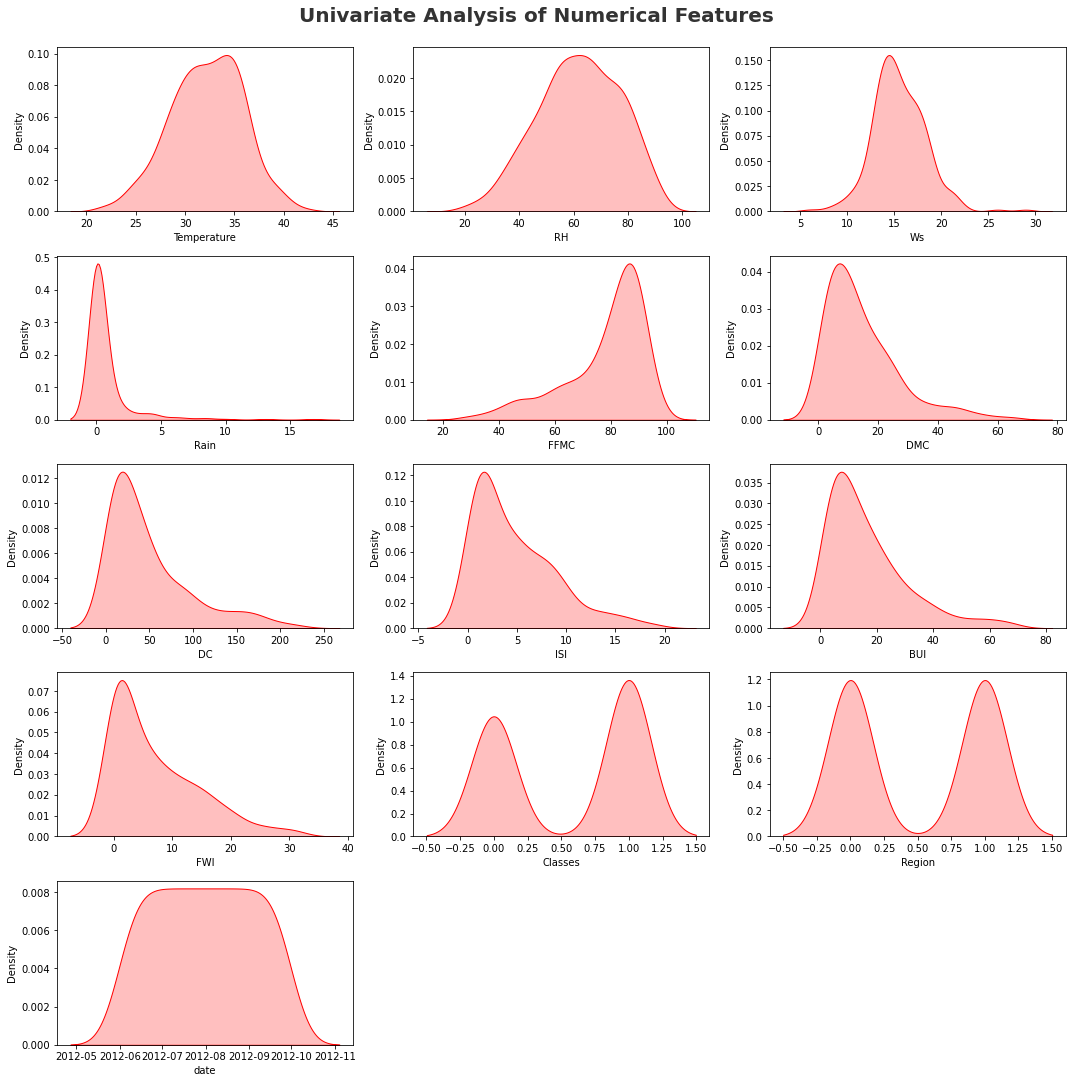

In [37]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_fea[i]],shade=True,color='r')
    plt.xlabel(num_fea[i])
    plt.tight_layout()

Observation:
=> Rain, DMC, DC, ISI, BUI, FWI are right skewed
=> FFMC is a left skewed 
=> Temperature, RH, date are normal distribution

## Count plot

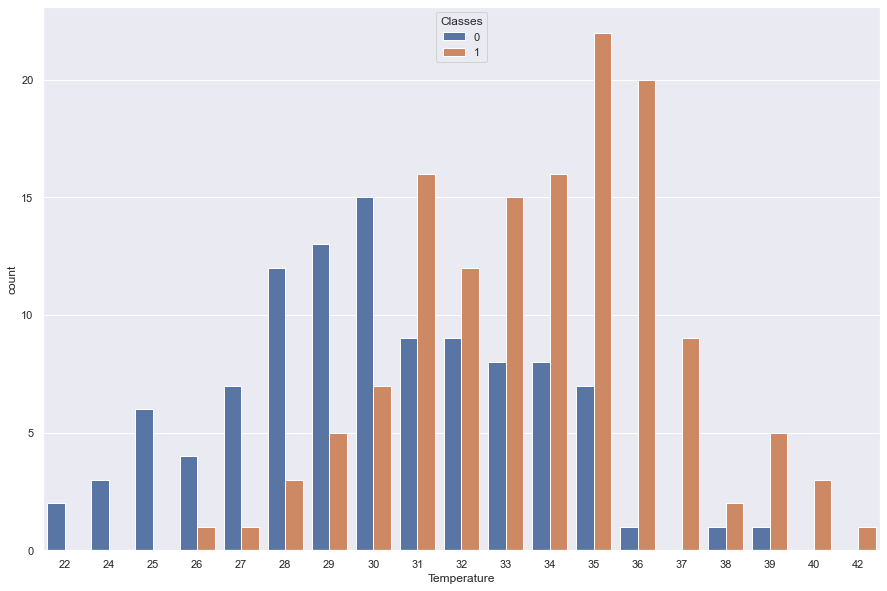

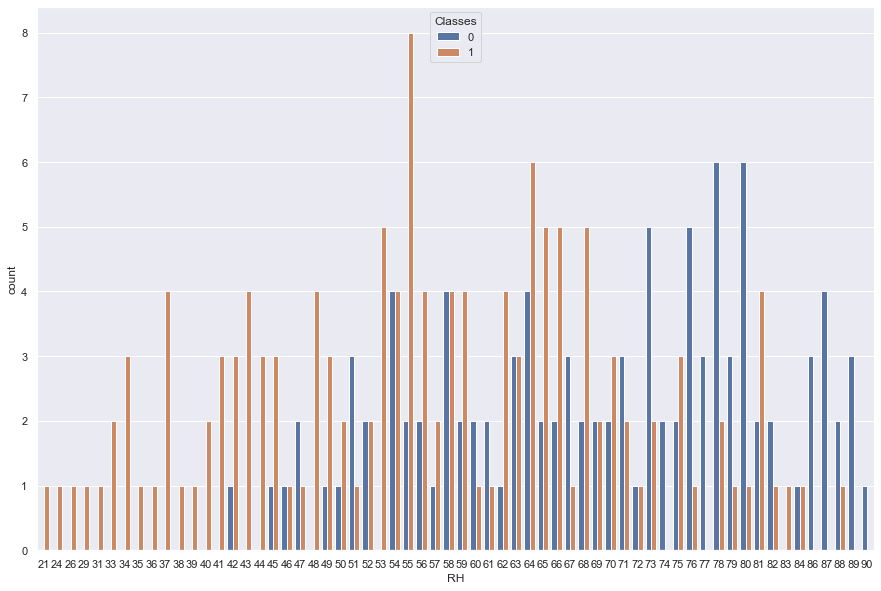

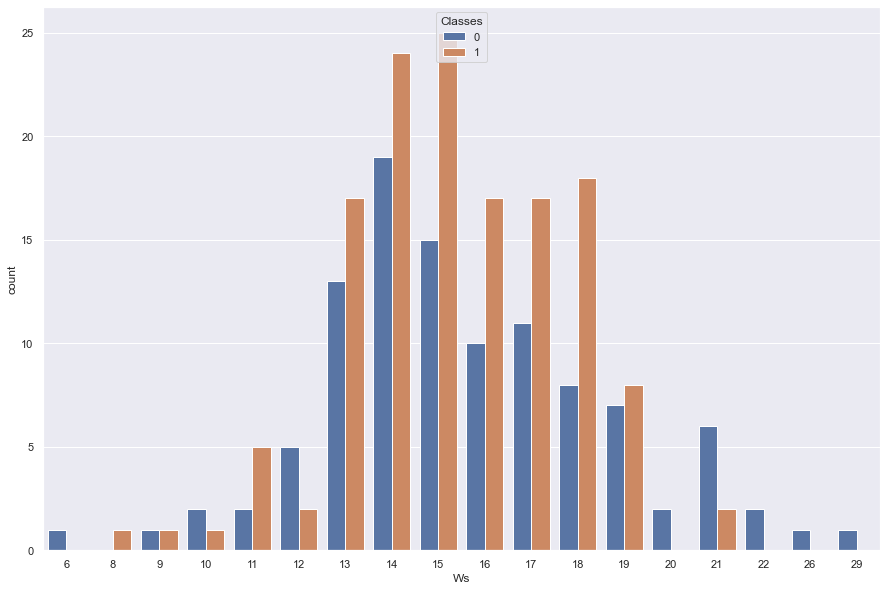

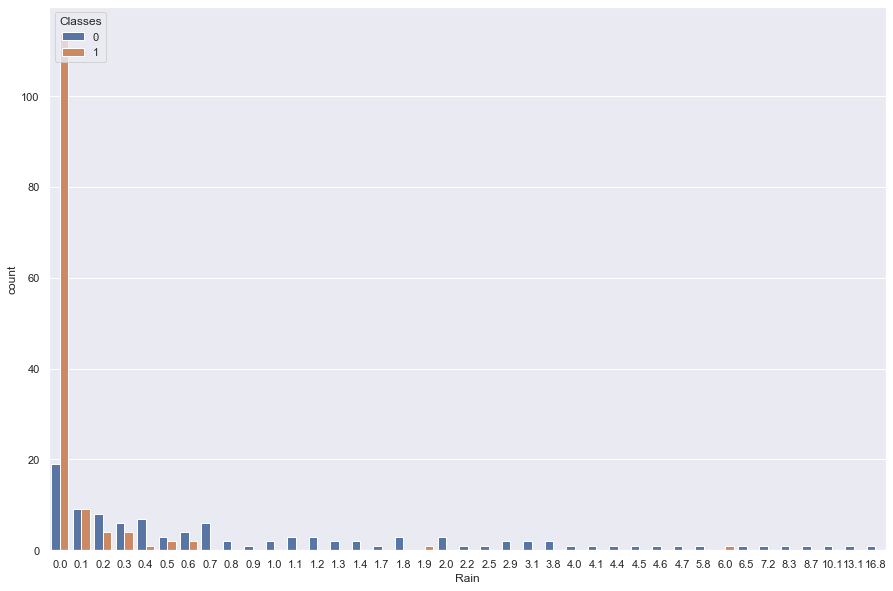

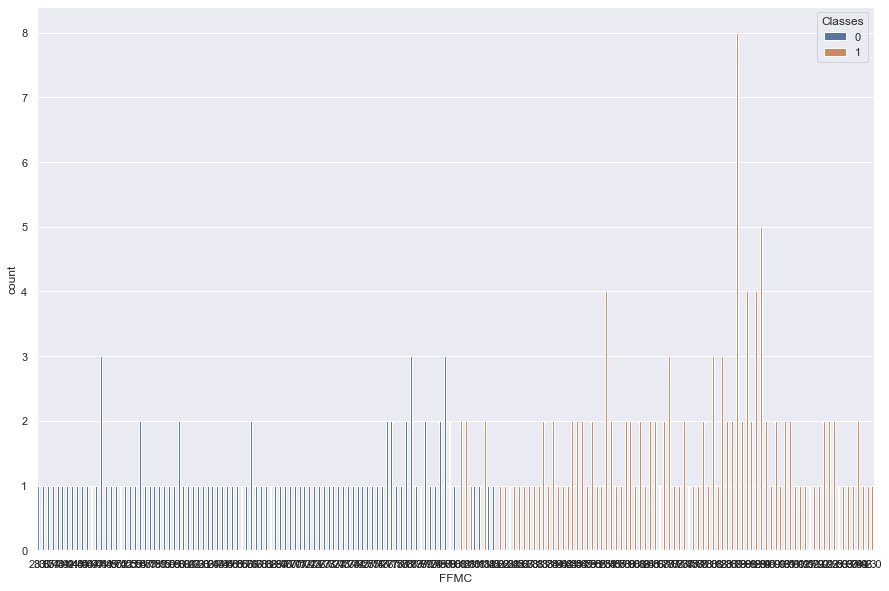

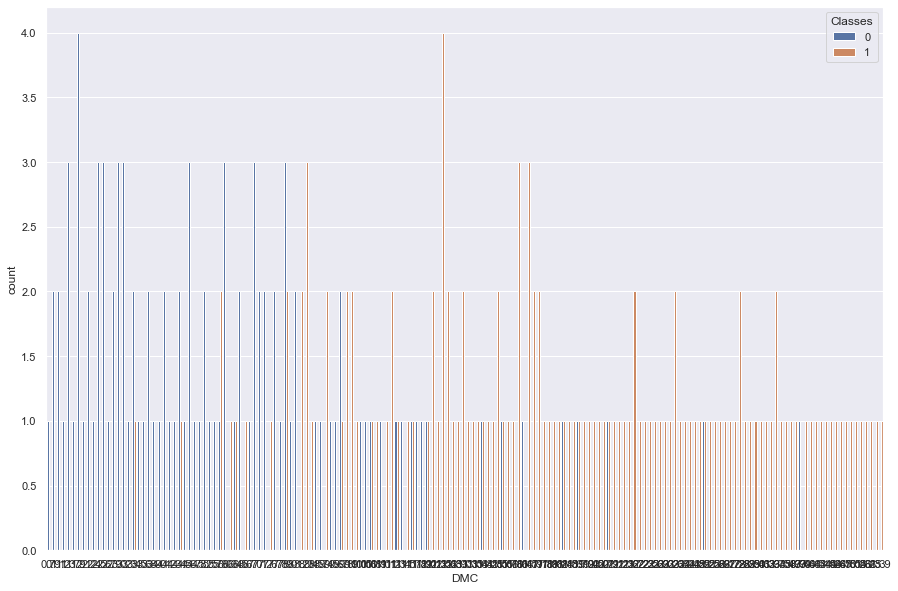

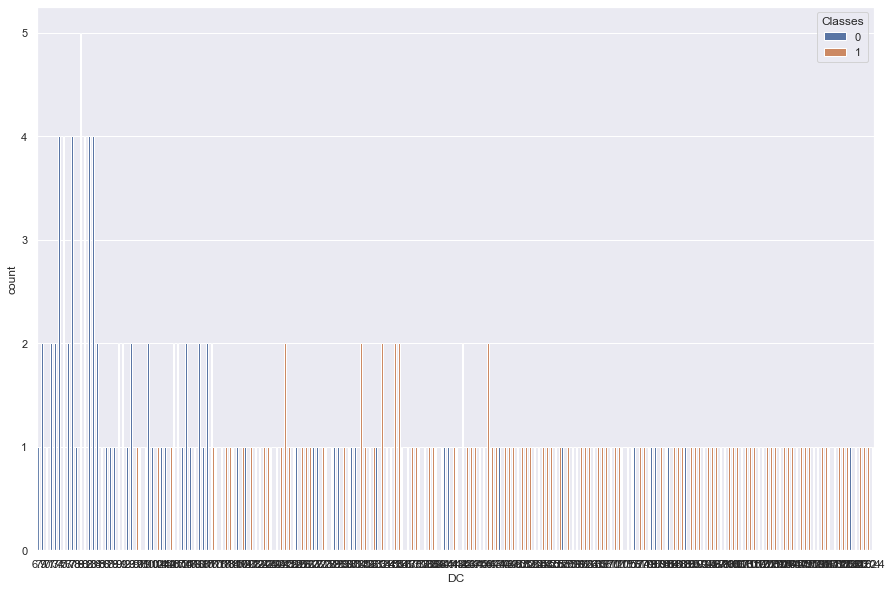

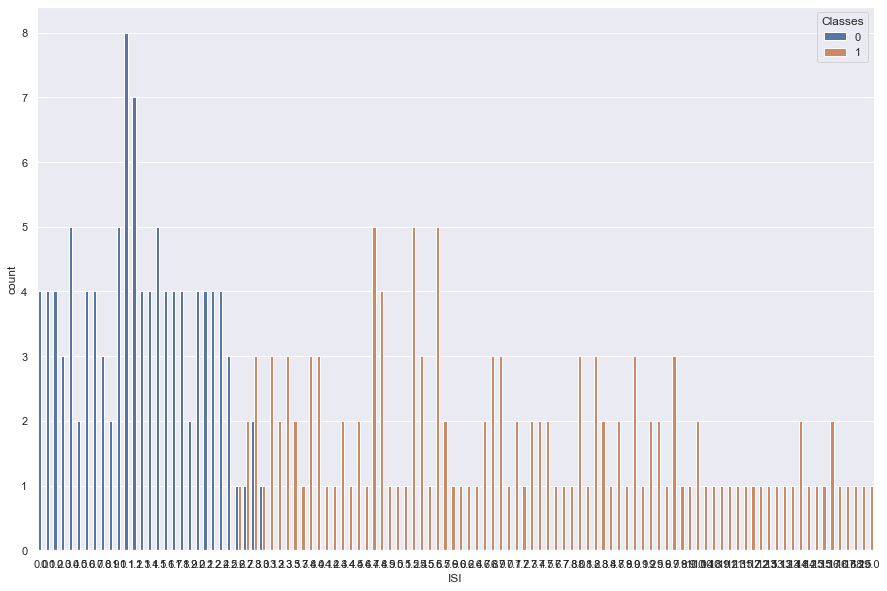

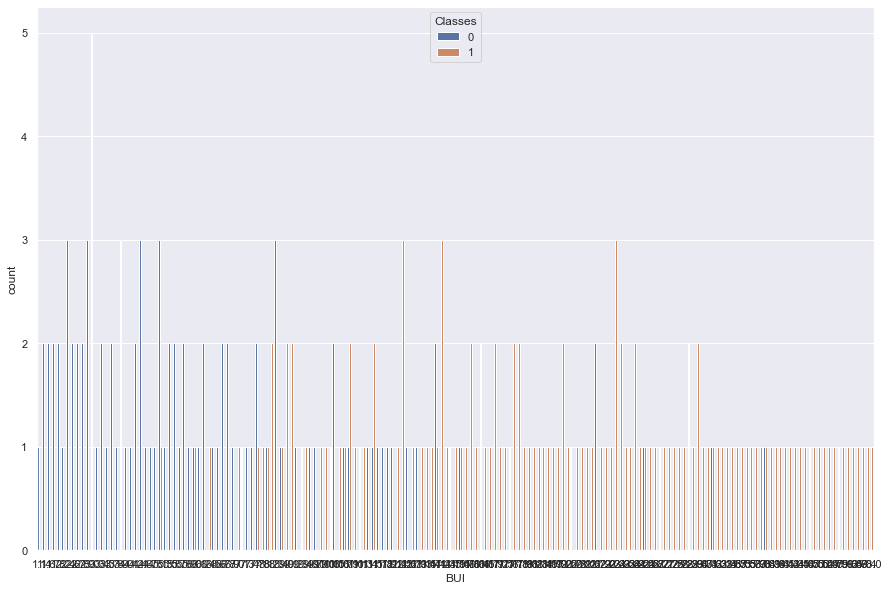

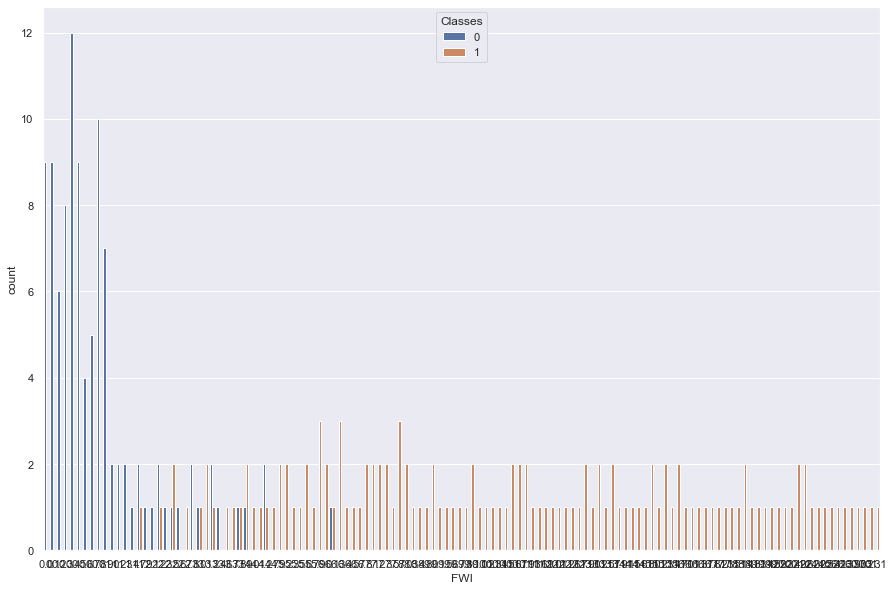

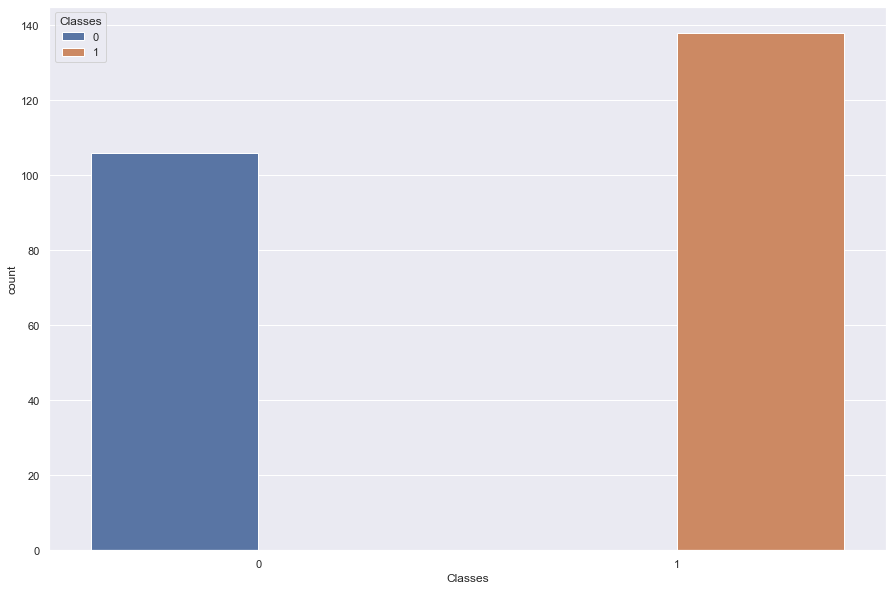

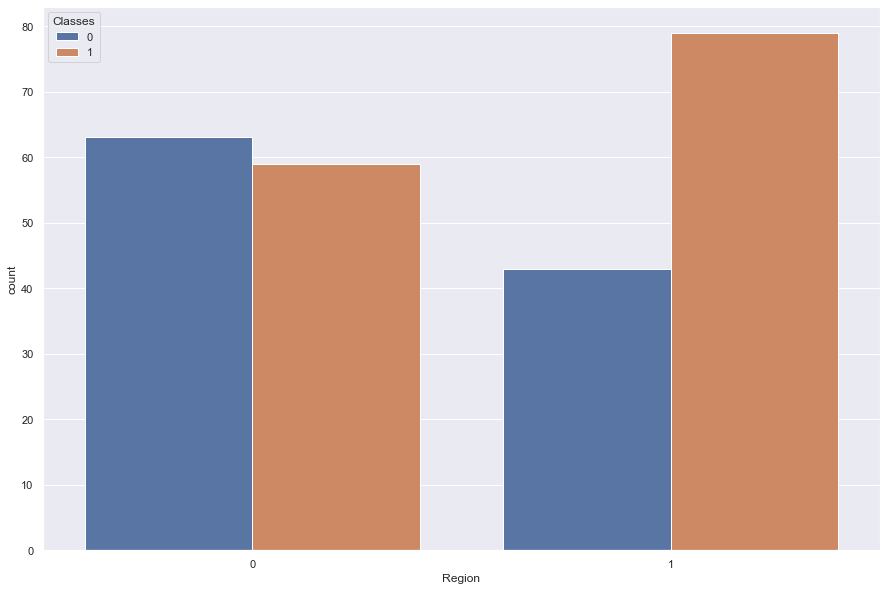

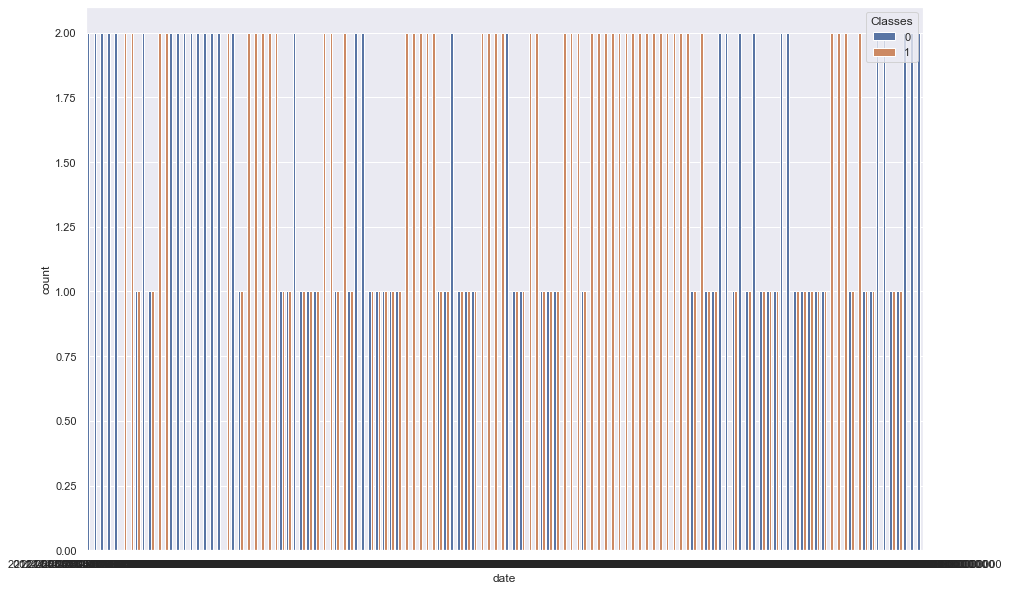

In [142]:
## we are analysing the bivariate analysis 

for fea in num_fea:
    sns.countplot(data=df,x=fea,hue='Classes')
    plt.show()

## Scatter plot to see the trends in each numeriacal columns

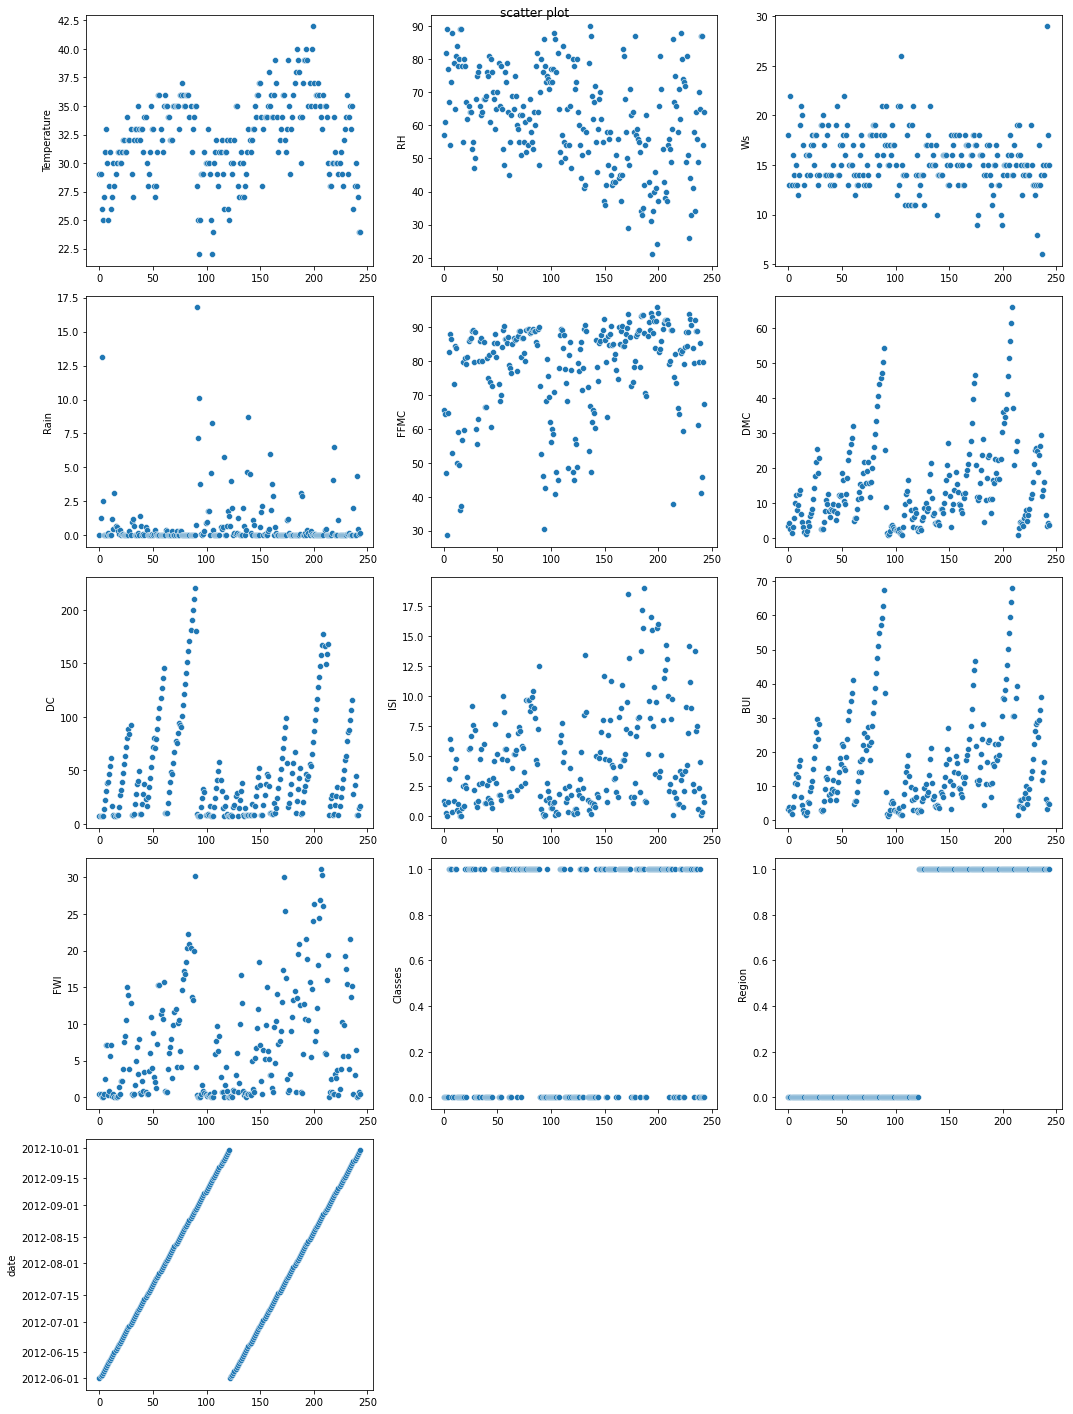

In [39]:
plt.figure(figsize=(15,20))
plt.suptitle('scatter plot ')

for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df.index,y=num_fea[i],data=df)
    plt.tight_layout()

### Strip plot 

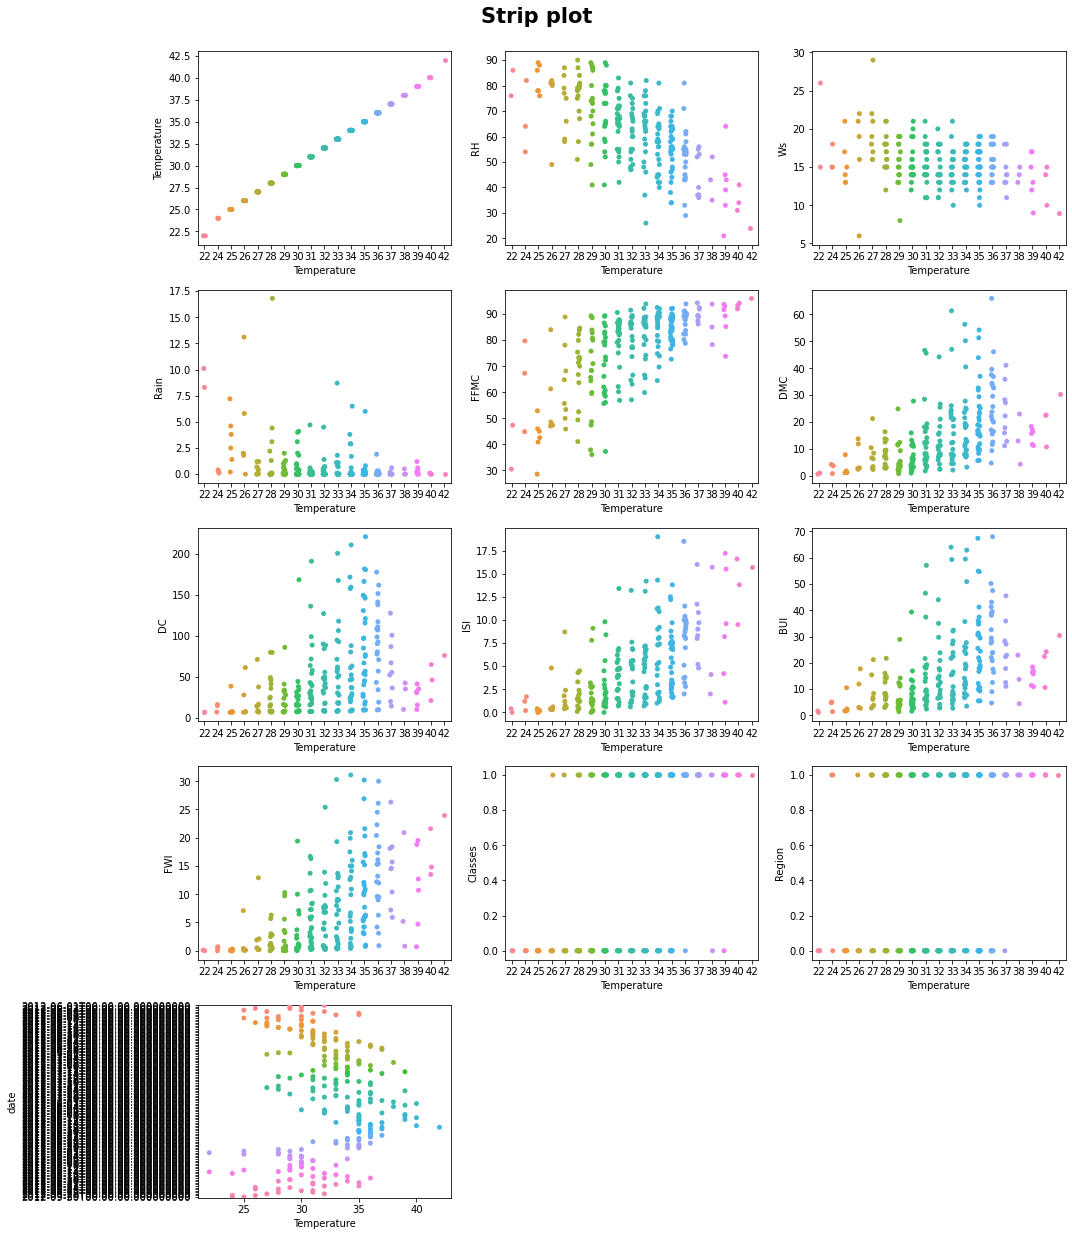

In [42]:
plt.figure(figsize =(15,20))
plt.suptitle('Strip plot', fontsize=21, fontweight='bold',alpha=1,y=1)

for i in range(0,len(num_fea)):
    plt.subplot(6,3,i+1)
    sns.stripplot(x='Temperature',y=num_fea[i],data=df)
    plt.tight_layout()

### Box plot 

In [43]:
# boxplot to find out outliers

<AxesSubplot:>

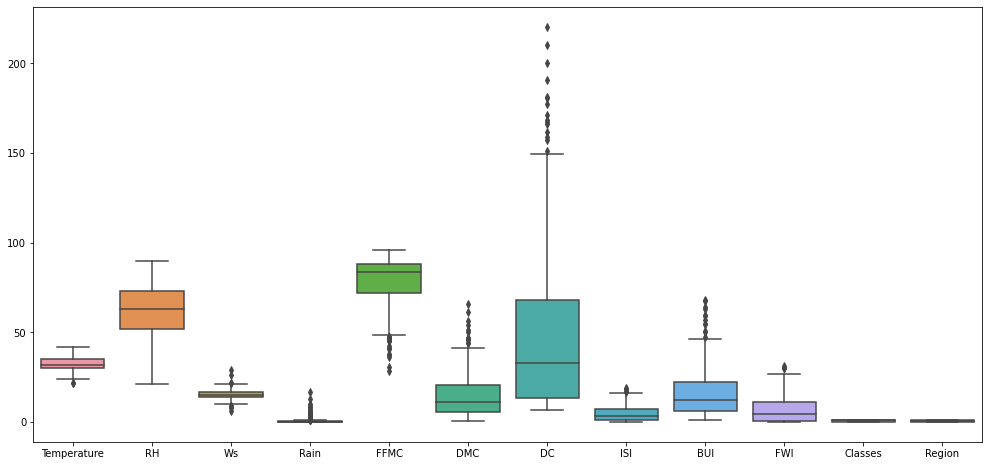

In [44]:
plt.figure(figsize = (17,8))
sns.boxplot(data = df)

Observation:
    RH, classes, region has no outliers
    temperature, ws, rain, ffmc, dmc, dc, isi, bui, fwi has more outliers

### Barplot

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

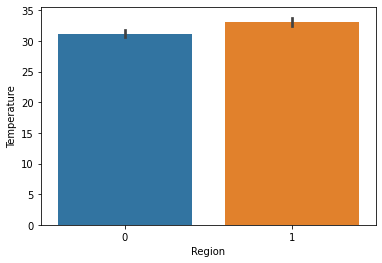

In [45]:
sns.barplot(x="Region",y='Temperature',data=df)

Observation:
    region 1 has more temperature
    region 0 has less temperature

### Corr visualization

In [138]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407,0.198474


### Pairplot

In [ ]:
### corr visualization

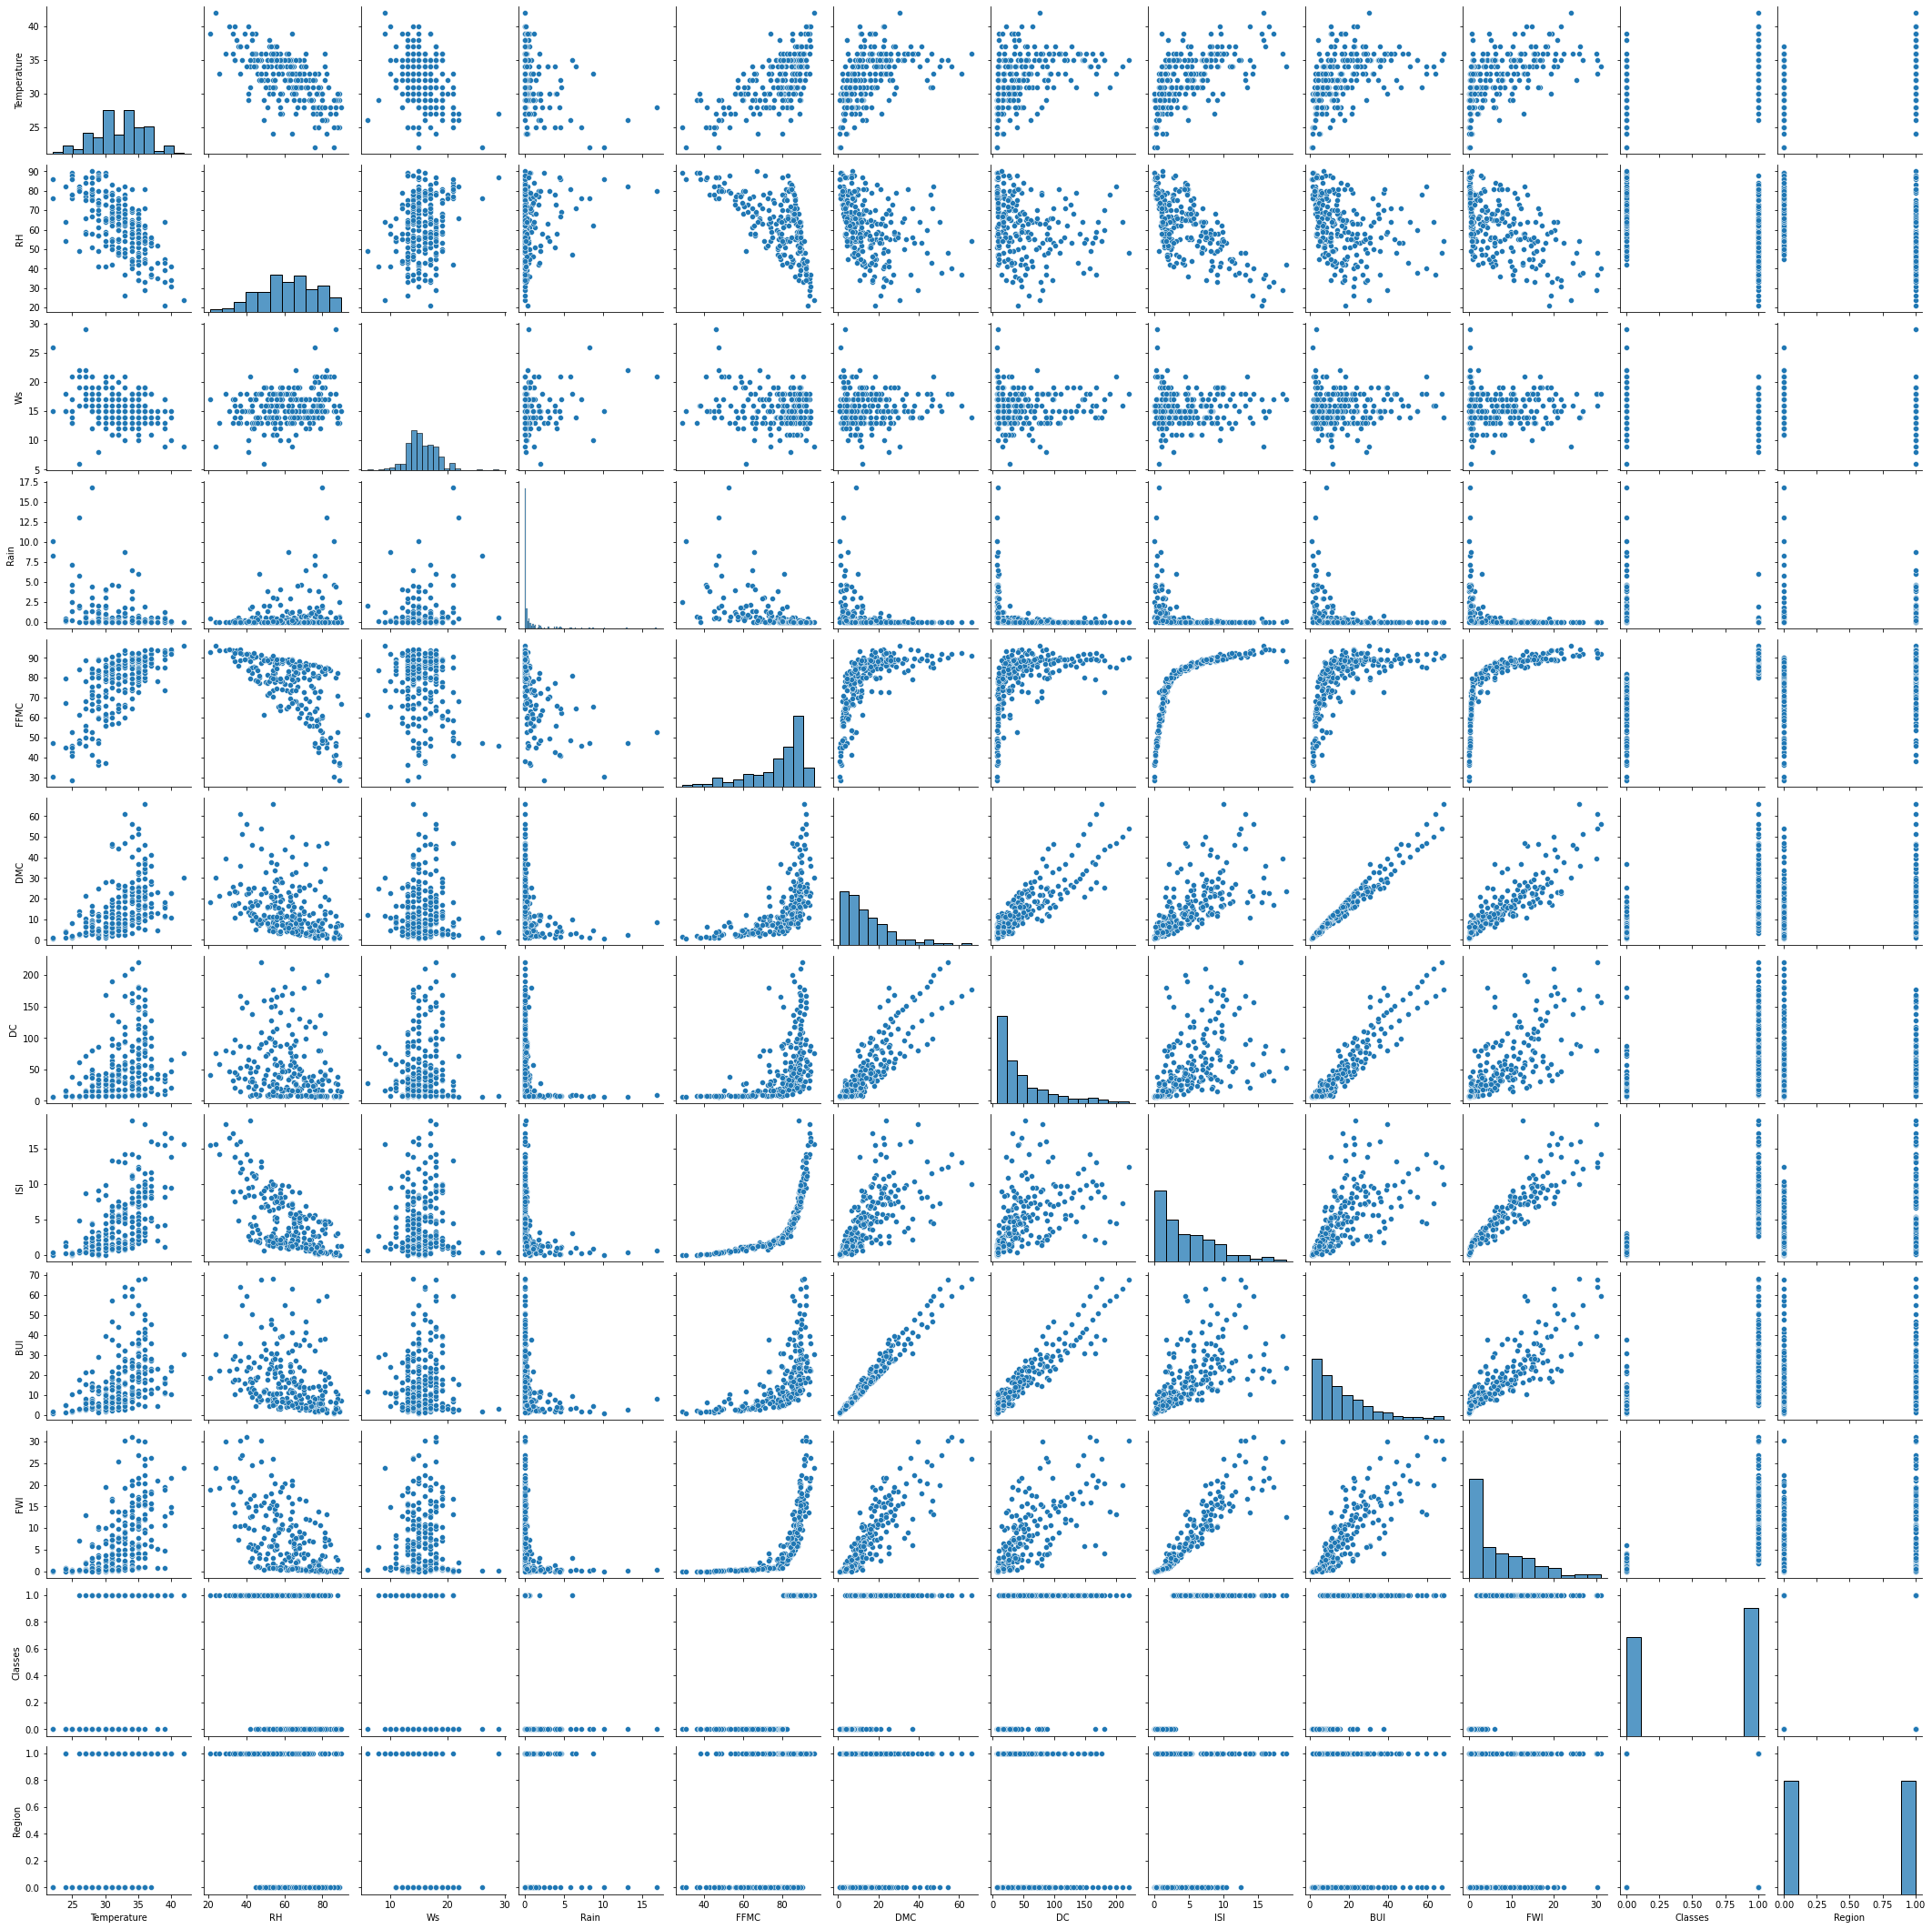

In [46]:
sns.pairplot(df)

### Heatmap

<AxesSubplot:>

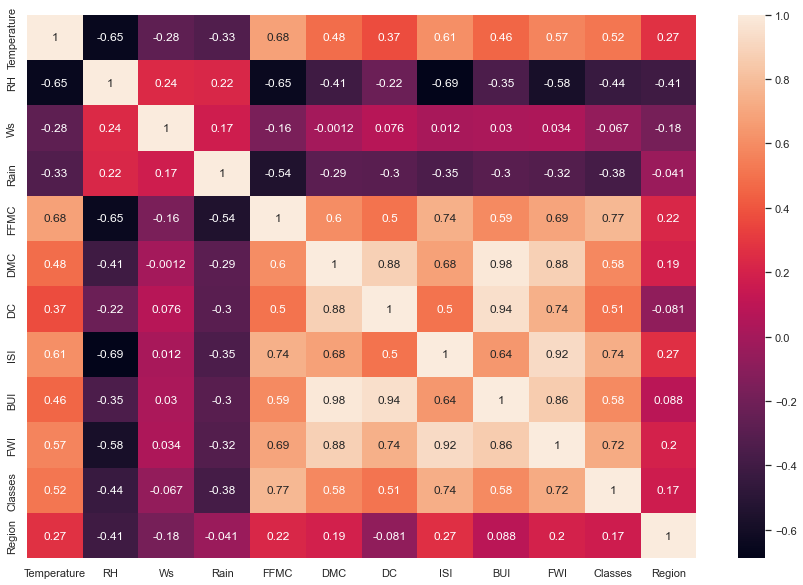

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

### Plot data in linear regression

### Regplot

In [48]:
# shaded region  in plot  is redge and lasso
# we see more points is there not shaped mean gap
# other have 
# point is more the shade region is less
# point is less the shade region is high

### rh vs temperatur

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

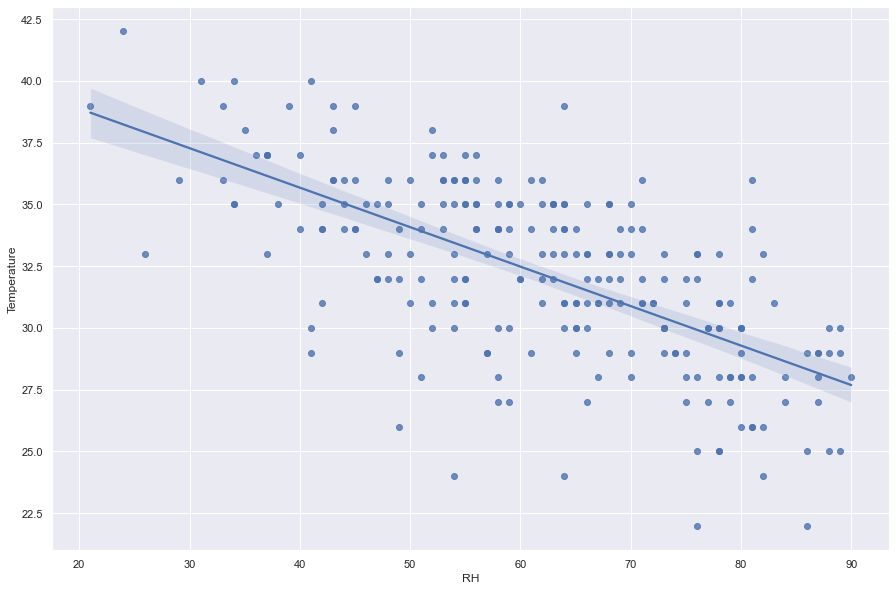

In [49]:
sns.regplot(x='RH',y='Temperature',data=df)

### ws vs temperature

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

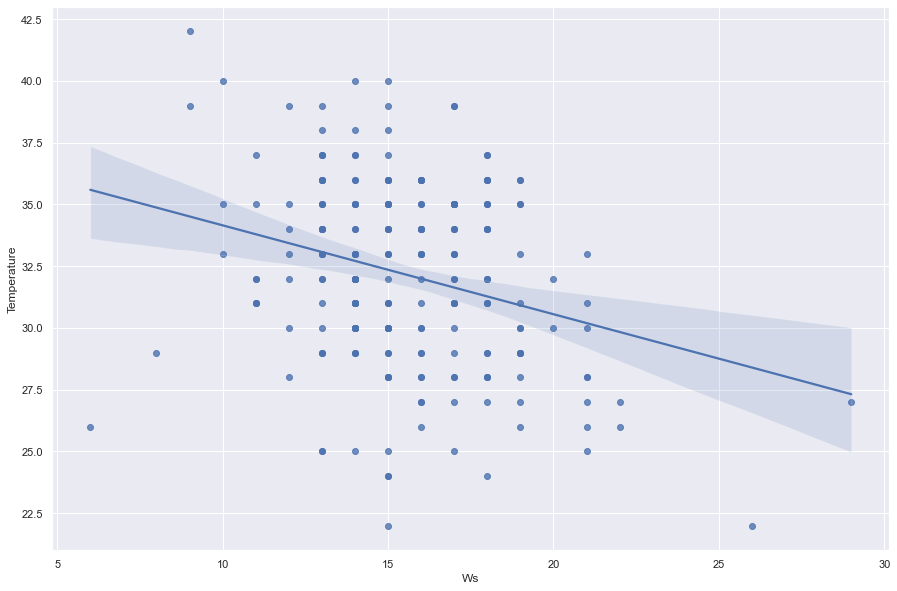

In [50]:
sns.regplot(x='Ws',y='Temperature',data=df)

### rain  vs  temperature

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

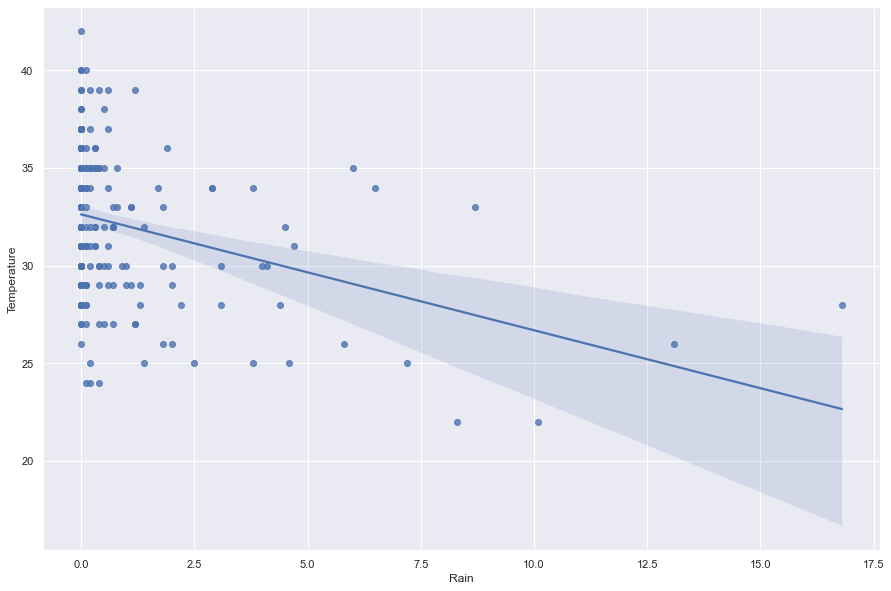

In [51]:
sns.regplot(x='Rain',y='Temperature',data=df)

### ffmc vs temperature

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

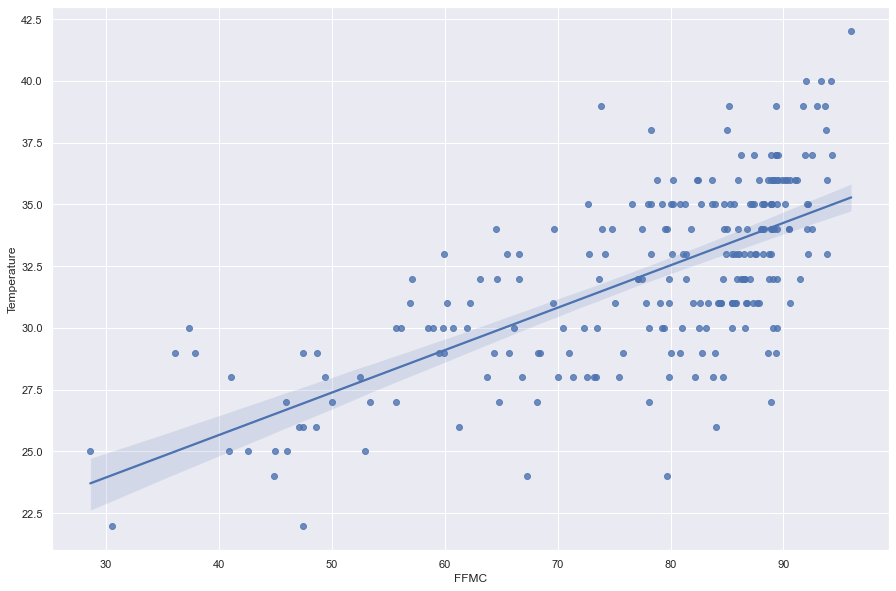

In [52]:
sns.regplot(x='FFMC',y='Temperature',data=df)

### dmc  vs temperature

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

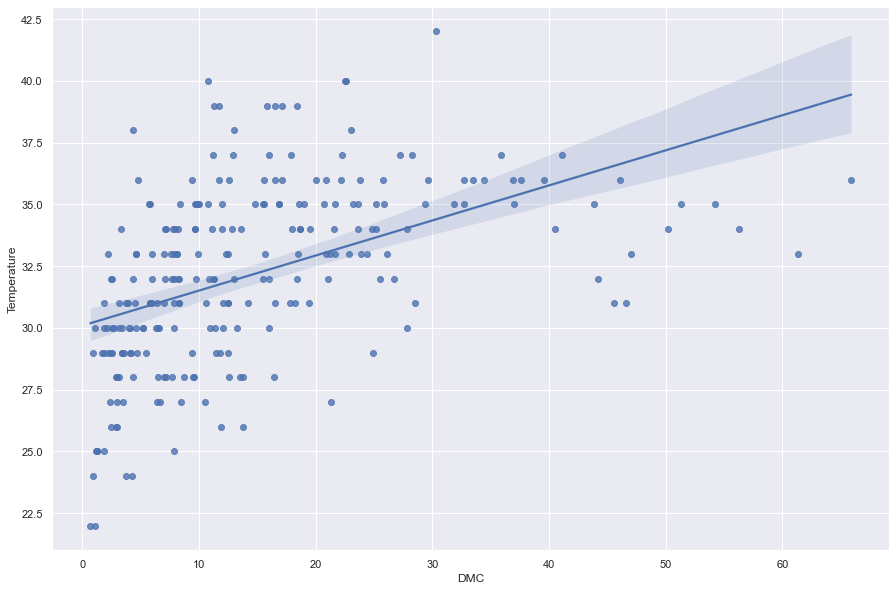

In [53]:
sns.regplot(x='DMC',y='Temperature',data=df)

### dc  vs temperature

<AxesSubplot:xlabel='DC', ylabel='Temperature'>

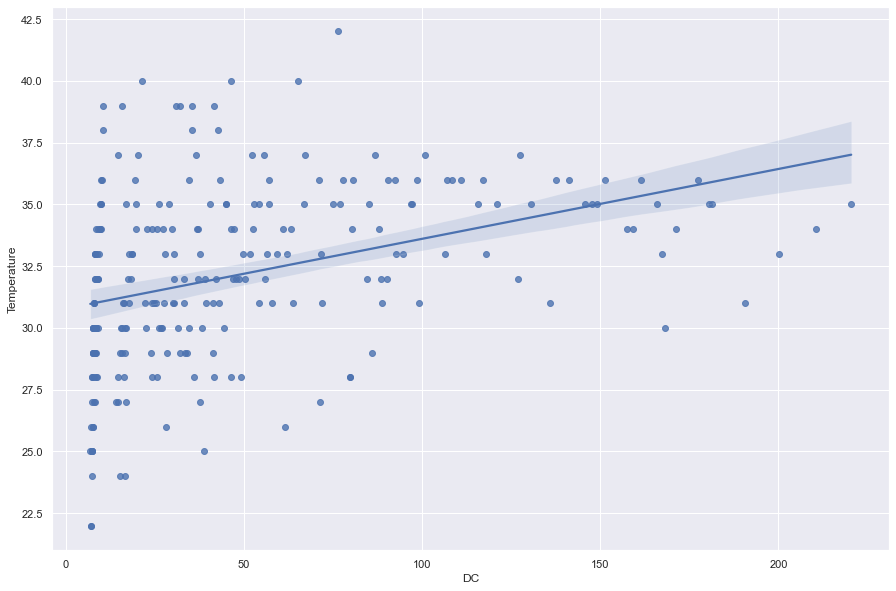

In [54]:
sns.regplot(x='DC',y='Temperature',data=df)

### isi  vs temperature

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

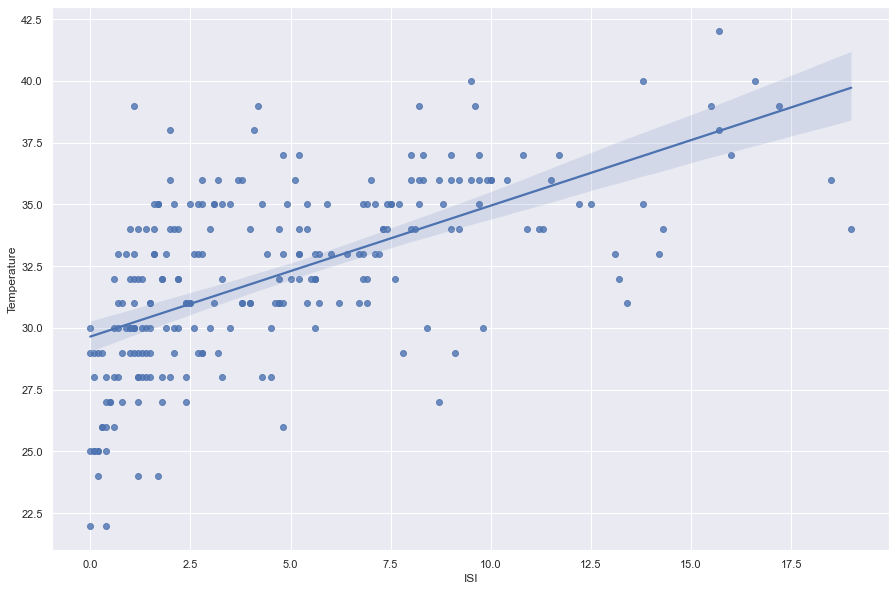

In [55]:
sns.regplot(x='ISI',y='Temperature',data=df)

### bui  vs temperature

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

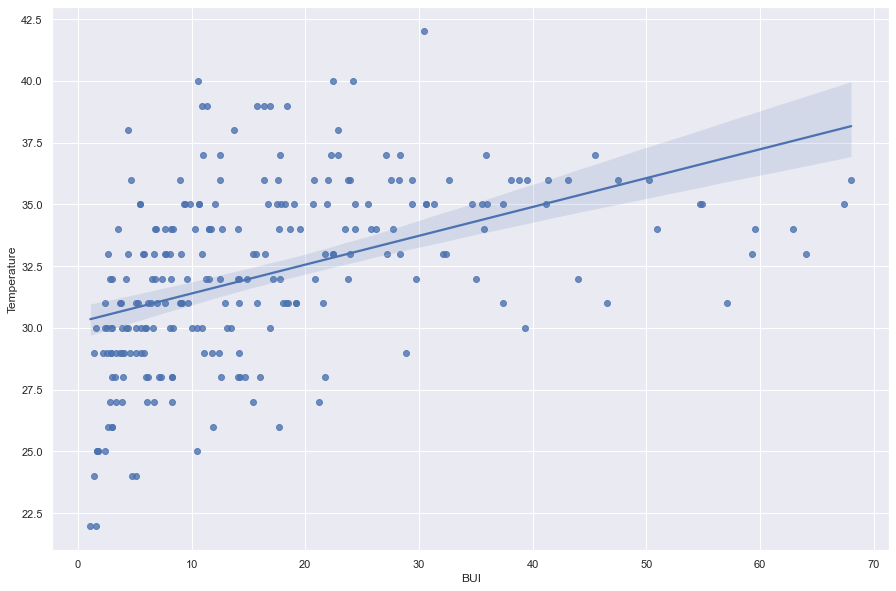

In [56]:
sns.regplot(x='BUI',y='Temperature',data=df)

### fwi  vs temperature

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

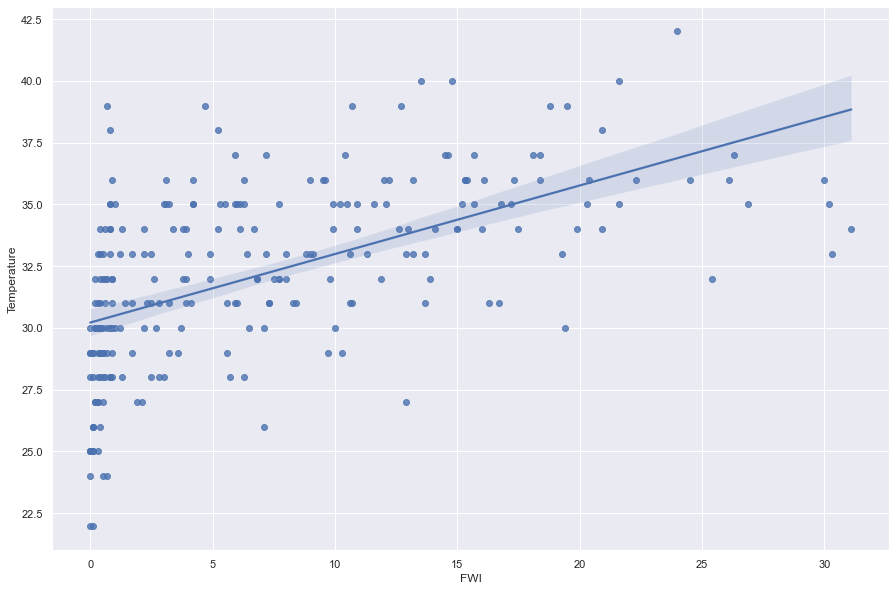

In [57]:
sns.regplot(x='FWI',y='Temperature',data=df)

### classes vs temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

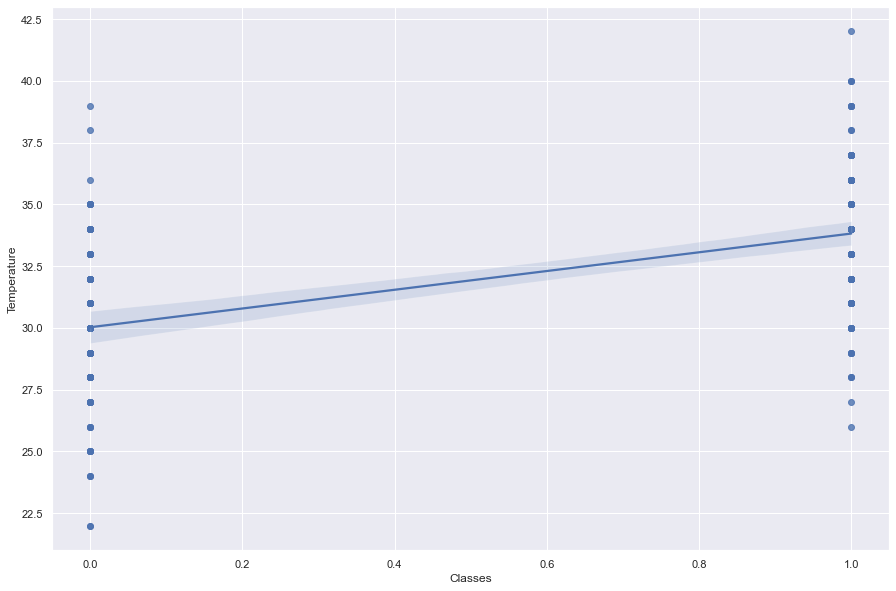

In [58]:
sns.regplot(x='Classes',y='Temperature',data=df)

### region  vs temperature

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

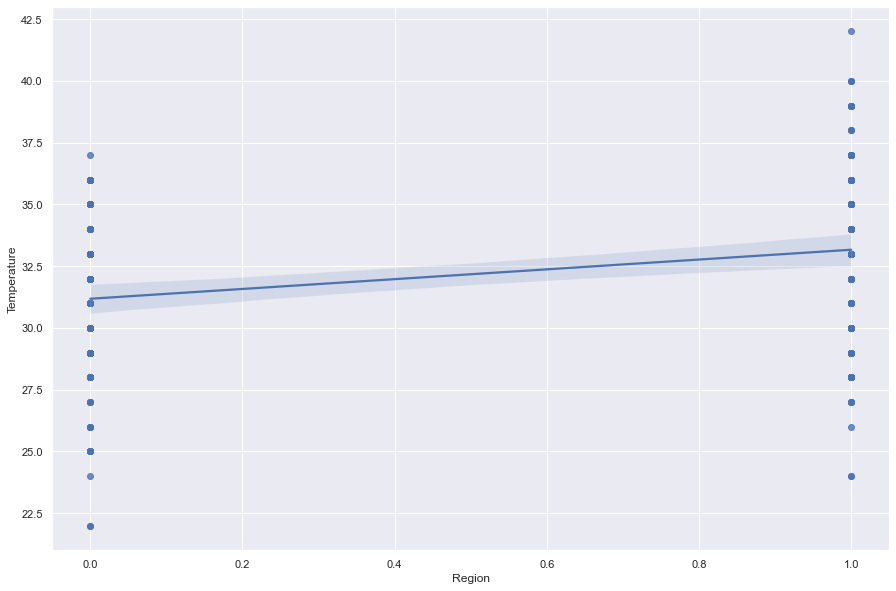

In [59]:
sns.regplot(x='Region',y='Temperature',data=df)

In [60]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


## Independent and Dependent feature seperation

### independent feature

In [61]:
X = df.iloc[:,1:-1]

### dependent feature

In [62]:
y = df.iloc[:,0]

In [63]:
# checing 
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [64]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

## Spliting the data into train  and test split

In [65]:
# spliting the data into train test split
# it will return 4 different paremeters
# output feature of x train is y train and x test is y test 
# test size = 0.25   if 1000 in 25% of data 
# random state 

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [67]:
X_train.shape

(163, 11)

In [68]:
y_train.shape

(163,)

In [69]:
X_test.shape

(81, 11)

In [70]:
y_test.shape

(81,)

## Standardizing or Feature scalling the dataset

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [72]:
# Apply data

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [75]:
#data lekage we dont need to leak the data of test to train data
#avoid datalekage use transform
#example :
#    is eaxm paper is x_train if you get before exam is called parer lekage
# f to f' we convert mean and std in fit and transform 

In [76]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [ 0.14460201, -0.93856657, -0.39436188, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-1.41768313,  2.04653297, -0.39436188, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [77]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01,
         9.57938964e-01, -9.93883735e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02,
         9.57938964e-01, -9.93883735e-01],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02,
         9.57938964e-01,  1.00615390e+00],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01,
         9.57938964e-01,  1.00615390e+00],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
  

## Model Training

In [78]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression

LinearRegression()

In [79]:
regression.fit(X_train,y_train)

LinearRegression()

### Coefficient and Intercept

In [80]:
print(regression.coef_)

[-1.05126674 -0.48159084  0.11938767  1.82417191  0.94467874  0.67540664
  0.17325427 -1.25422021  0.0537007  -0.23927078 -0.00511072]


In [81]:
print(regression.intercept_)

31.98159509202454


## Prediction 

In [82]:
reg_pred = regression.predict(X_test)
reg_pred

array([33.04281582, 34.18373317, 33.94262556, 33.12802489, 36.58081437,
       32.54990698, 35.21895989, 27.32175238, 30.96985655, 29.60339718,
       29.36216075, 33.3713269 , 33.9660541 , 33.37413504, 34.21146262,
       32.16667325, 37.06595141, 25.21346832, 32.29221418, 33.54538576,
       30.91440937, 28.43873771, 35.06373488, 28.67822485, 36.46752406,
       26.81905285, 32.74394806, 33.29778191, 32.84197893, 34.66821705,
       34.54137306, 31.59706773, 32.66796918, 33.31570383, 32.69911436,
       33.29613965, 30.40105147, 34.24122196, 31.8380836 , 23.73446099,
       33.60548737, 33.77838277, 32.43685622, 24.8281907 , 36.1657581 ,
       32.45334978, 31.14713505, 30.44305813, 35.30965237, 34.62074891,
       36.93021848, 30.95822914, 30.88244254, 34.35343577, 33.86159459,
       32.12780851, 36.88091527, 32.3288728 , 30.12070206, 36.49040274,
       33.13768817, 30.00109432, 33.98838284, 32.04060986, 31.81504287,
       24.80400402, 33.17469174, 30.59601544, 36.73404251, 34.58

### Assumption of Linear Regression

In [83]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

### 1.linear relationship between y_test and reg_prediction

Text(0, 0.5, 'test predicted data')

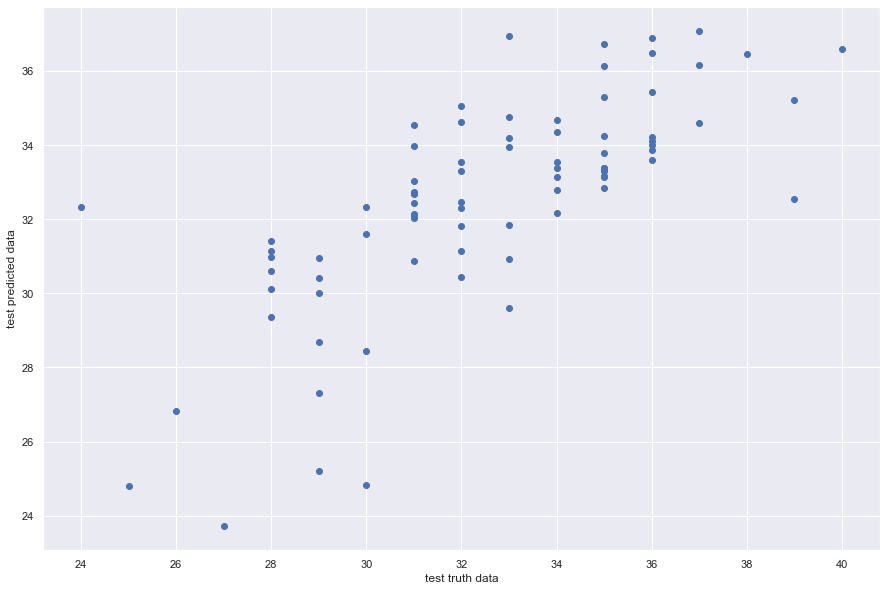

In [84]:
plt.scatter(y_test,reg_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

### 2.residual we get normal distributin

In [85]:
residuals = y_test - reg_pred
residuals

24    -2.042816
6     -1.183733
153   -0.942626
211    1.871975
198    3.419186
         ...   
180    0.461862
5     -1.122311
56     0.577737
125   -2.340719
148    1.899806
Name: Temperature, Length: 81, dtype: float64

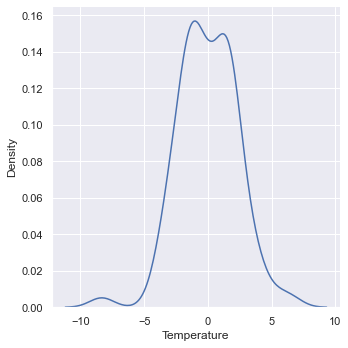

In [86]:
sns.displot(residuals,kind='kde')

### 3.uniform distributin

In [87]:
## scatter plot with prediction and residual
## uniform distribution  called below plo

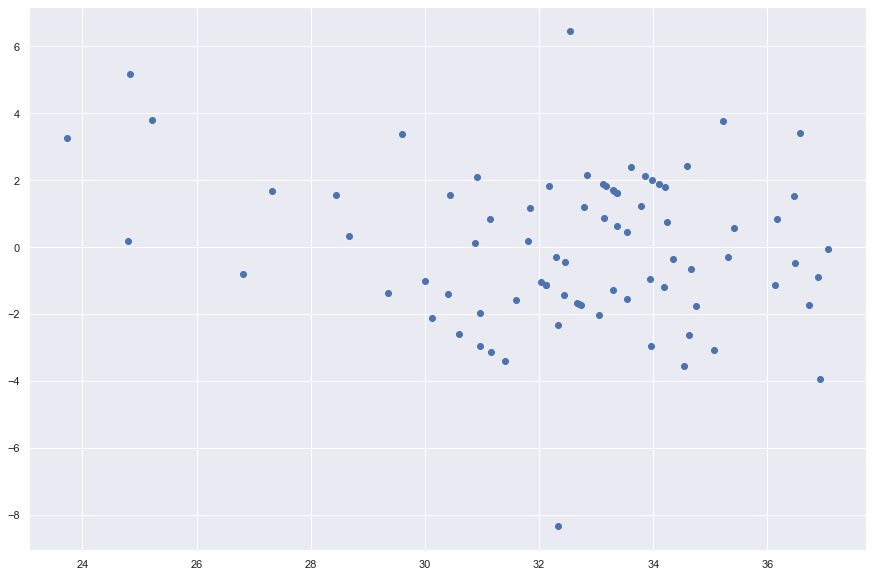

In [88]:
plt.scatter(reg_pred,residuals)

### Mean_squared_error, Mean_absolute_error, Root mean square error

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.208488116232257
1.8297548308020077
2.282211233920352


## Performance Metrics

### R Squared 

In [90]:
from sklearn.metrics import r2_score
linear_score = r2_score(y_test,reg_pred)
print(linear_score)

0.5150717960749278


### Adjusted R Squared 

In [91]:
1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.437764401246293

## Ridge Regression:

### Train the Model

In [92]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,y_train)

Ridge(alpha=0.99)

### Coefficient and Intercept

In [93]:
print(ridgeR.coef_)

[-1.0603827  -0.48247028  0.103006    1.76997509  0.44896271  0.43633654
  0.2171534  -0.49095187 -0.01457222 -0.22989405  0.00997644]


In [94]:
print(ridgeR.intercept_)

31.98159509202454


### Prediction

In [95]:
ridgeR_pred = ridgeR.predict(X_test)
ridgeR_pred

array([33.03703532, 34.13986742, 33.9230024 , 33.1465684 , 36.55519553,
       32.58829202, 35.19676247, 27.38380412, 30.98064269, 29.60156146,
       29.34581086, 33.43754527, 33.91240038, 33.38918319, 34.25352319,
       32.14890454, 36.98229481, 25.29265754, 32.24261314, 33.52465167,
       30.87100591, 28.43359751, 35.03100492, 28.68653408, 36.47144325,
       26.84962548, 32.73580381, 33.30529063, 32.84489674, 34.61605839,
       34.52190817, 31.5919525 , 32.64407534, 33.36089243, 32.66605215,
       33.2821847 , 30.3432505 , 34.26694779, 31.80177943, 23.79831953,
       33.61803235, 33.77992474, 32.43218673, 24.89376354, 36.10493875,
       32.41168313, 31.13448973, 30.45274196, 35.28738503, 34.61534151,
       36.8740493 , 30.92310918, 30.89474016, 34.41553512, 33.84426077,
       32.24480798, 36.86813253, 32.32600243, 30.13700492, 36.48581499,
       33.10461989, 29.98703993, 33.93577532, 32.02760007, 31.81737762,
       24.83229543, 33.15596365, 30.57171511, 36.70933298, 34.61

### Assumptions for ridgeRegression

### 1.linear relationship between y_test and predicted y

Text(0, 0.5, 'test predicted data')

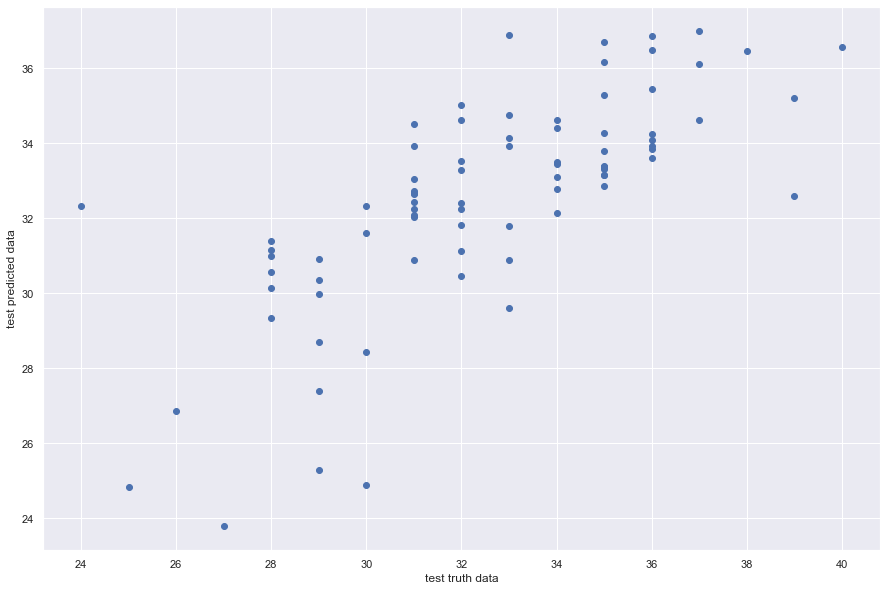

In [96]:
plt.scatter(y_test,ridgeR_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

### 2.residual we get normal distribution

In [97]:
residuals= y_test-ridgeR_pred
residuals

24    -2.037035
6     -1.139867
153   -0.923002
211    1.853432
198    3.444804
         ...   
180    0.509349
5     -1.096184
56     0.567244
125   -2.327291
148    1.919885
Name: Temperature, Length: 81, dtype: float64

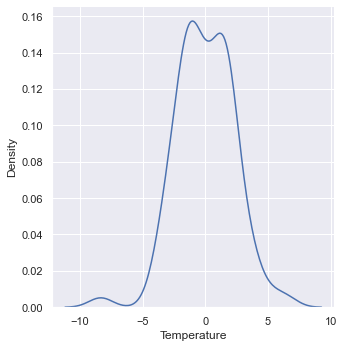

In [98]:
sns.displot(residuals,kind='kde')

### 3.Uniform distribution

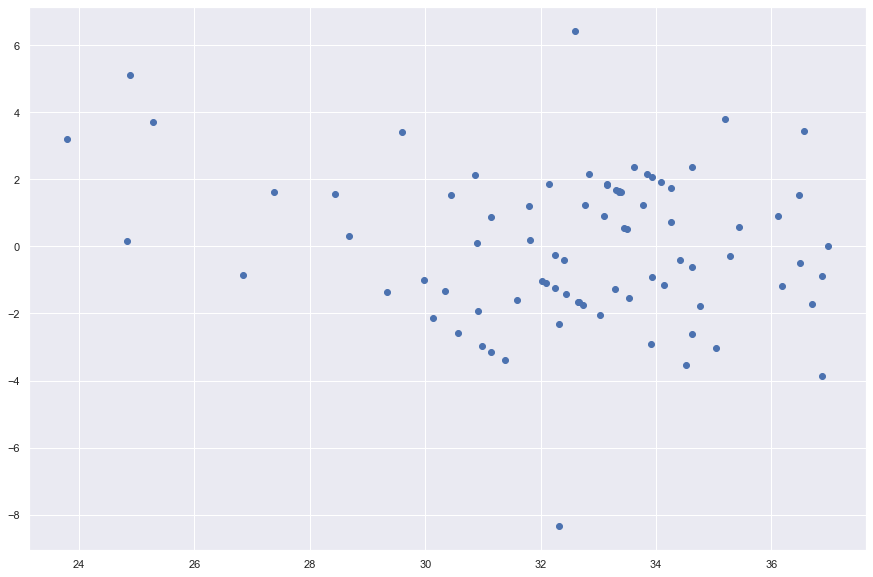

In [100]:
# scatter plot with prediction and residual
# uniform distribution called below plot

plt.scatter(ridgeR_pred,residuals)

## Performance Metrics

In [101]:
# mean squared error, mean absolute error, root mean square error

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridgeR_pred))
print(mean_absolute_error(y_test,ridgeR_pred))
print(np.sqrt(mean_squared_error(y_test,ridgeR_pred)))

5.1609305484880625
1.8204108968922816
2.271768154651364


### R Square

In [104]:
from sklearn.metrics import r2_score
ridgeR_score = r2_score(y_test,ridgeR_pred)
print(ridgeR_score)

0.5194995696235252


### Adjusted R Squared

In [105]:
1-(1-ridgeR_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4428980517374205

## Lasso Regression:

### Train the model

In [107]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05)

### Coefficient and Intercept

In [108]:
print(lasso.coef_)

[-1.14351042 -0.38959936  0.          1.60766408  0.19021954  0.1505428
  0.01479416  0.          0.         -0.          0.        ]


In [109]:
print(lasso.intercept_)

31.98159509202454


### Prediction

In [110]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([33.10068594, 34.16909409, 34.06572152, 33.29832552, 36.33971798,
       32.35616345, 35.274234  , 27.45932539, 30.74954827, 29.52908042,
       29.50510865, 33.19552099, 33.66318829, 33.170849  , 34.19923109,
       32.2736529 , 36.61065379, 25.51342279, 32.26347727, 33.66045814,
       30.70453592, 28.46720366, 34.98784451, 28.90484174, 36.23620339,
       27.0366415 , 32.8662064 , 33.34916318, 33.09657046, 34.5920238 ,
       34.51750355, 31.40159905, 32.75760909, 33.38474096, 32.60458918,
       33.26775553, 30.27696818, 34.48550099, 31.32411804, 24.44832455,
       33.71986156, 33.91859271, 32.49506958, 25.20067319, 35.94108842,
       32.51738263, 31.29332202, 30.44740178, 35.45107045, 34.61058991,
       36.70605927, 31.15892409, 31.0733626 , 34.22273045, 33.81325237,
       32.33364388, 36.65215752, 32.36125976, 30.25480346, 36.45631965,
       33.19007592, 30.12692971, 33.95092625, 32.1368825 , 31.81374529,
       25.10459197, 33.26768874, 30.73357683, 36.54981286, 34.84

### Assumptions of LassoRegression

In [ ]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

### 1.relationship between real y and predicted y

Text(0, 0.5, 'test predict data')

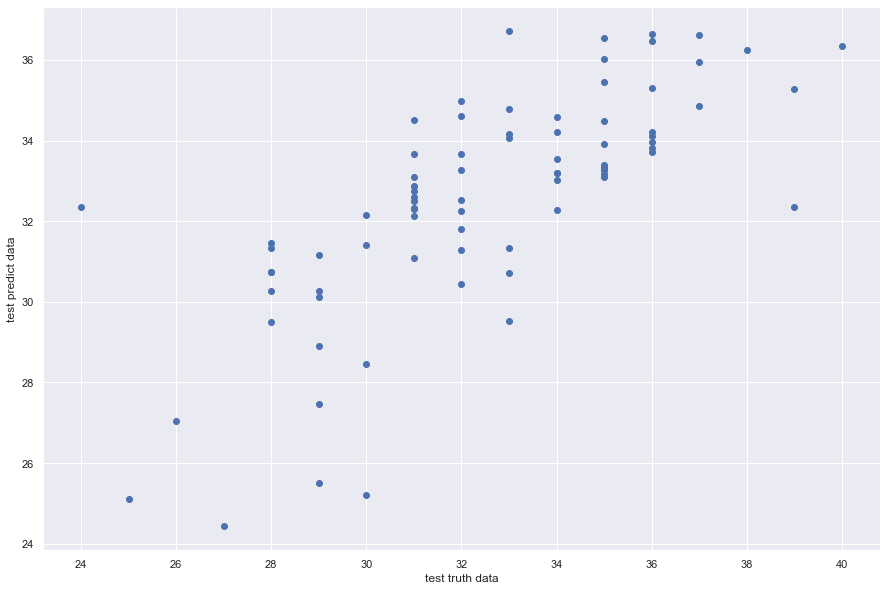

In [111]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("test truth data")
plt.ylabel("test predict data")

### 2.residual 

In [112]:
residuals = y_test - lasso_pred
residuals

24    -2.100686
6     -1.169094
153   -1.065722
211    1.701674
198    3.660282
         ...   
180    0.467614
5     -1.300345
56     0.703122
125   -2.148986
148    1.890479
Name: Temperature, Length: 81, dtype: float64

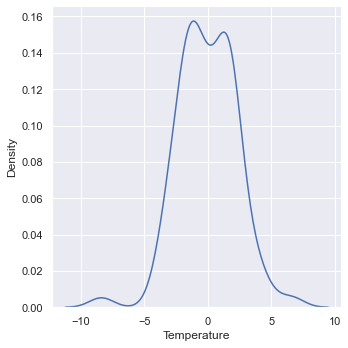

In [113]:
sns.displot(residuals,kind='kde')

### 3.get uniform distribution

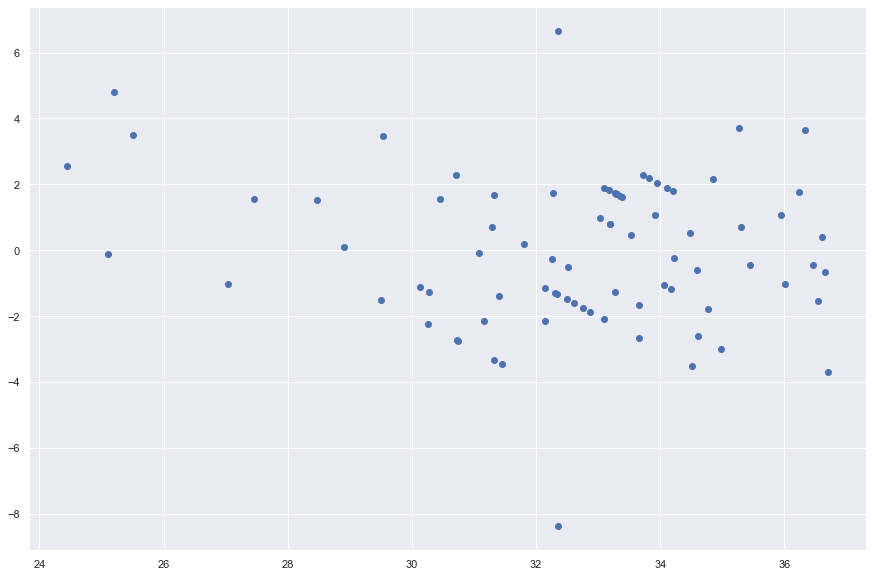

In [114]:
plt.scatter(lasso_pred,residuals)

## Performance Metrics

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

5.117291412163739
1.8169325664744338
2.2621431016104485


### R Square

In [117]:
from sklearn.metrics import r2_score
lasso_score = r2_score(y_test,lasso_pred)
print(lasso_score)

0.5235625236951003


### Adjusted R Square

In [118]:
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.44760872312475397

## ElasticNet Regression

### Train the model

In [121]:
from sklearn.linear_model import ElasticNet
elas_net = ElasticNet(alpha=0.2,l1_ratio=.2)
elas_net.fit(X_train,y_train)

ElasticNet(alpha=0.2, l1_ratio=0.2)

### Coefficirnt and Intercept

In [122]:
print(elas_net.coef_)

[-0.99021193 -0.41392435 -0.06475598  1.21240385  0.15397277  0.12933095
  0.24656233  0.07999207  0.08206581  0.01988117  0.03843941]


In [123]:
print(elas_net.intercept_)

31.98159509202454


### Prediction

In [124]:
elastic_pred = elas_net.predict(X_test)
elastic_pred

array([32.94452846, 33.89800806, 33.8054905 , 33.06440211, 36.21155733,
       32.25235565, 35.01760209, 28.06235766, 30.76199791, 29.72842468,
       29.37429135, 32.97881163, 33.25040204, 32.93129519, 34.2691025 ,
       32.22059966, 36.85317988, 26.50163279, 32.18479724, 33.41277401,
       30.54995303, 28.7605909 , 34.67970073, 29.03554876, 36.36960064,
       27.58568589, 32.65807279, 33.21640402, 32.58004346, 34.56782142,
       34.25730231, 31.3070555 , 32.65626365, 33.37988341, 32.20674899,
       32.81146276, 30.12980252, 34.14902944, 31.1677371 , 25.11441012,
       33.46454815, 33.62865758, 32.08360603, 26.13049032, 35.85794742,
       32.39076583, 31.36983176, 30.44281863, 35.12107191, 34.44059646,
       36.91742207, 31.00642349, 31.16840354, 34.3976827 , 33.76311126,
       32.39266906, 36.97846166, 31.96453927, 30.23688726, 36.24163708,
       33.12120543, 30.04135076, 33.91855001, 32.04417237, 31.53187576,
       25.7508697 , 33.10508874, 30.74196754, 36.68216055, 34.59

### Assumptions of ElasticNet Regression

In [ ]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and predicted 
# 2.residuals we get normal distribution
# 3 get uniform distribution

### 1.relationship between actual y test and y predicted

Text(0, 0.5, 'test predicted data')

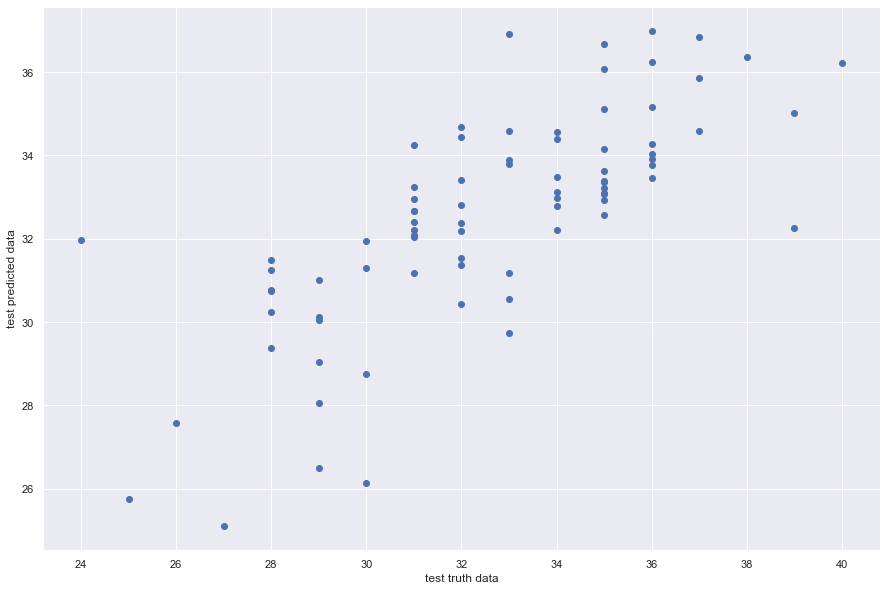

In [125]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

### 2.residual

In [126]:
residuals = y_test - elastic_pred
residuals

24    -1.944528
6     -0.898008
153   -0.805491
211    1.935598
198    3.788443
         ...   
180    0.524544
5     -1.064115
56     0.841641
125   -1.935000
148    1.956419
Name: Temperature, Length: 81, dtype: float64

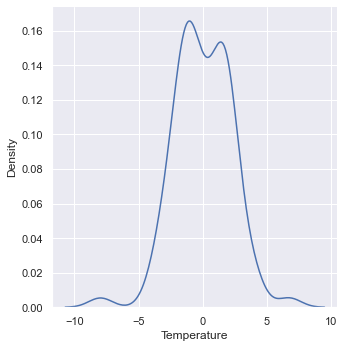

In [127]:
sns.displot(residuals,kind='kde')

### 3.uniform distribution

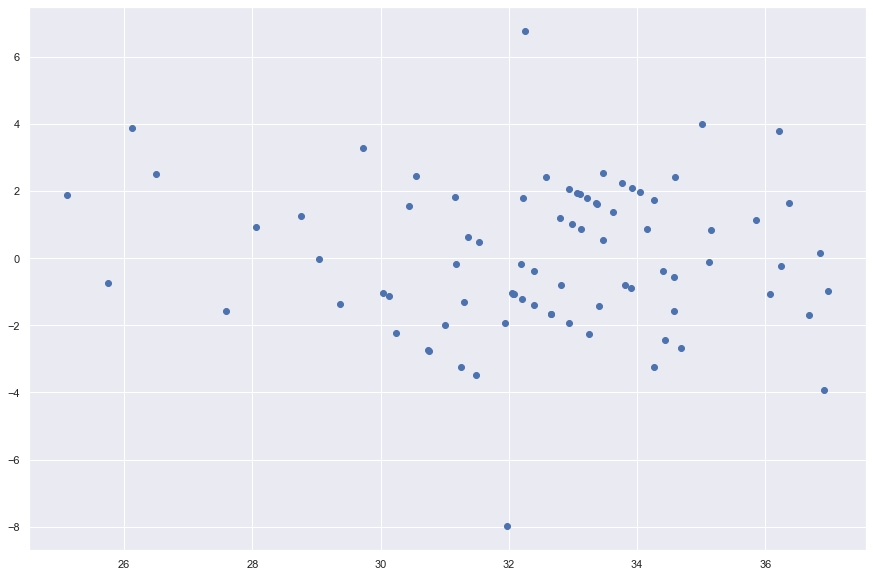

In [131]:
plt.scatter(elastic_pred,residuals)

## Performance Metrics

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

4.816802294980992
1.7704639472804067
2.1947214618217483


### R Square

In [132]:
from sklearn.metrics import r2_score
elastic_score = r2_score(y_test,elastic_pred)
print(elastic_score)

0.5515390966741835


### Adjusted R Square

In [134]:
1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.48004532947731415

Follow me on: 
    linkedin link:   https://www.linkedin.com/in/dharavath-ramdas-a283aa213/
    GitHub link:  https://github.com/dharavathramdas101